# CS 156a - Problem Set 2

### Patrone Samuel, 2140749

The following notebook is publicly available at https://github.com/spatrone/CS156A-Caltech.git.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Patrone-Samuel,-2140749" data-toc-modified-id="Patrone-Samuel,-2140749-0.1">Patrone Samuel, 2140749</a></span></li></ul></li><li><span><a href="#Problem-1" data-toc-modified-id="Problem-1-1">Problem 1</a></span><ul class="toc-item"><li><span><a href="#Answer:--[b]-$0.01$" data-toc-modified-id="Answer:--[b]-$0.01$-1.1">Answer:  [b] $0.01$</a></span></li><li><span><a href="#Code:" data-toc-modified-id="Code:-1.2">Code:</a></span></li></ul></li><li><span><a href="#Problem-2" data-toc-modified-id="Problem-2-2">Problem 2</a></span><ul class="toc-item"><li><span><a href="#Answer:--[d]-$c_1-\,-{\rm-and}\,--c_{rand}$" data-toc-modified-id="Answer:--[d]-$c_1-\,-{\rm-and}\,--c_{rand}$-2.1">Answer:  [d] $c_1 \, {\rm and}\,  c_{rand}$</a></span></li><li><span><a href="#Derivation:" data-toc-modified-id="Derivation:-2.2">Derivation:</a></span></li></ul></li><li><span><a href="#Problem-3" data-toc-modified-id="Problem-3-3">Problem 3</a></span><ul class="toc-item"><li><span><a href="#Answer:--[e]-$(1-\lambda)(1-\mu)+\lambda\mu$" data-toc-modified-id="Answer:--[e]-$(1-\lambda)(1-\mu)+\lambda\mu$-3.1">Answer:  [e] $(1-\lambda)(1-\mu)+\lambda\mu$</a></span></li><li><span><a href="#Derivation:" data-toc-modified-id="Derivation:-3.2">Derivation:</a></span></li></ul></li><li><span><a href="#Problem-4" data-toc-modified-id="Problem-4-4">Problem 4</a></span><ul class="toc-item"><li><span><a href="#Answer:-[b]-$0.5$" data-toc-modified-id="Answer:-[b]-$0.5$-4.1">Answer: [b] $0.5$</a></span></li><li><span><a href="#Derivation:" data-toc-modified-id="Derivation:-4.2">Derivation:</a></span></li></ul></li><li><span><a href="#Problems-5-6" data-toc-modified-id="Problems-5-6-5">Problems 5-6</a></span><ul class="toc-item"><li><span><a href="#Answers:-[c]-$0.01$-,--[c]-$0.01$" data-toc-modified-id="Answers:-[c]-$0.01$-,--[c]-$0.01$-5.1">Answers: [c] $0.01$ ,  [c] $0.01$</a></span></li><li><span><a href="#Code:" data-toc-modified-id="Code:-5.2">Code:</a></span></li></ul></li><li><span><a href="#Problem-7" data-toc-modified-id="Problem-7-6">Problem 7</a></span><ul class="toc-item"><li><span><a href="#Answer:-[a]-$1$" data-toc-modified-id="Answer:-[a]-$1$-6.1">Answer: [a] $1$</a></span></li><li><span><a href="#Code:" data-toc-modified-id="Code:-6.2">Code:</a></span></li></ul></li><li><span><a href="#Problem-8" data-toc-modified-id="Problem-8-7">Problem 8</a></span><ul class="toc-item"><li><span><a href="#Answer:-[d]-$0.5$" data-toc-modified-id="Answer:-[d]-$0.5$-7.1">Answer: [d] $0.5$</a></span></li><li><span><a href="#Code:" data-toc-modified-id="Code:-7.2">Code:</a></span></li></ul></li><li><span><a href="#Problems-9-10" data-toc-modified-id="Problems-9-10-8">Problems 9-10</a></span><ul class="toc-item"><li><span><a href="#Answers:-[a]-$g(x_1,x_2)={\rm-sign}(-1-0.05-x_1+0.08-x_2+0.13-x_1-x_2+1.5-x_1^2+1.5-x_2^2)$-,-[b]-$0.1$" data-toc-modified-id="Answers:-[a]-$g(x_1,x_2)={\rm-sign}(-1-0.05-x_1+0.08-x_2+0.13-x_1-x_2+1.5-x_1^2+1.5-x_2^2)$-,-[b]-$0.1$-8.1">Answers: [a] $g(x_1,x_2)={\rm sign}(-1-0.05 x_1+0.08 x_2+0.13 x_1 x_2+1.5 x_1^2+1.5 x_2^2)$ , [b] $0.1$</a></span></li><li><span><a href="#Code:" data-toc-modified-id="Code:-8.2">Code:</a></span></li></ul></li></ul></div>

## Problem 1

### Answer:  [b] $0.01$

### Code:


In [1]:
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
import pickle
import math as m

def flipcoin_heads(Ntimes):
    heads=0
    for i in range(Ntimes):
        heads+=np.random.randint(0,2)
    return heads

def get_freq(Ncoins,Nflips, c_spec=0):
    c_rand=np.random.randint(0,Ncoins)
    nu_min=1
    nu_spec=0
    for i in range(Ncoins):
        nu_toss=flipcoin_heads(Nflips)/Nflips
        if(i==c_spec): nu_spec=nu_toss
        if(i==c_rand): nu_rand=nu_toss
        if(nu_toss<nu_min): nu_min=nu_toss
    return [nu_spec,nu_rand,nu_min]


def run_exp(Ntimes,Ncoins,Nflips,filename='freq.npy',saveonfile=True):
    freq=[]
    for i in range(Ntimes):
        clear_output(wait=True)
        print("Current progress:",np.round(i/Ntimes*100,2),"%")
        freq.append(get_freq(Ncoins,Nflips, c_spec=0))
    if(saveonfile==True):
        with open('freq.npy', 'wb') as f:
            np.save(f, np.array(freq))
    return np.array(freq)

In [2]:
#The generation of the distribution takes approximately 100 mins. If saveonfile=True, the full array is automatically saved on a .npy file.
#freq=run_exp(100000,1000,10)

In [3]:
with open('freq.npy', 'rb') as f:
    freq= np.load(f)

In [4]:
nu_min_av=np.sum(freq[:,2])/100000
print("The average value of nu_min is",nu_min_av)

The average value of nu_min is 0.03756


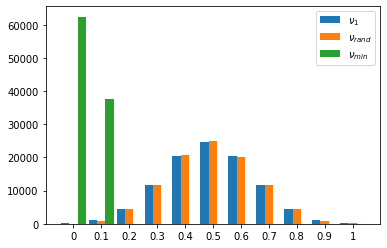

In [5]:
(freq_1, bins) = np.histogram(freq[:,0], bins=11)
(freq_rand, bins) = np.histogram(freq[:,1], bins=11)
(freq_min, bins) = np.histogram(freq[:,2], bins=3)
freq_min=np.append(freq_min,np.zeros(8),0)

xaxis=np.linspace(0,1,11)

fig=plt.figure()
width=0.03
plt.bar(xaxis,freq_1,width,label=r'$\nu_{1}$')
plt.bar(xaxis+width,freq_rand,width,label=r'$\nu_{rand}$')
plt.bar(xaxis+width*2,freq_min,width,label=r'$\nu_{min}$')
plt.xticks(xaxis+width,['0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1'])
plt.legend(loc='upper right')
plt.show()

## Problem 2

### Answer:  [d] $c_1 \, {\rm and}\,  c_{rand}$

### Derivation:

We expect the single bin's Hoeffding Inequality, in formulae

$$
\mathcal{P}[|\nu-\mu|>\epsilon]\le 2 e^{-2\epsilon^2 N}\,,
$$

to hold only for hypothesis $h$ fixed before the generation of the data set. Clearly, both $\nu_{1}$ and $\nu_{rand}$ are fixed before tossing the $1000$ coins, while $\nu_{min}$ is decided only after generating the dataset. Here, $N$ is the size of the sample, i.e. the number of times we flip each coin.

We first notice that the probability of heads is $\mu=0.5$ for the three coins since they are assumed to be fair. Therefore, we can compute $|\nu-\mu|$ in the three cases.
We can superimpose Hoeffding bound computed at various $\epsilon$ to the previous histogram (once we rescale the frequencies in order to estimate probabilities). The following plot shows explicitly the violation of the Hoeffding Bound by the $\nu_{min}$ distribution.

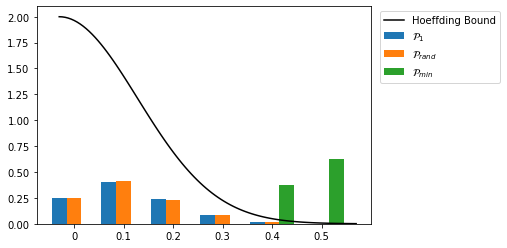

In [6]:
def Hoeff_bound(N,M,epsilon):
    return 2*M*m.exp(-2*epsilon**2*N)

absdev_1=np.abs(freq[:,0]-0.5)
absdev_rand=np.abs(freq[:,1]-0.5)
absdev_min=np.abs(freq[:,2]-0.5)

(P_1, bins) = np.histogram(absdev_1, bins=6)
(P_rand, bins) = np.histogram(absdev_rand, bins=6)
(P_min, bins) = np.histogram(absdev_min, bins=3)

P_1=P_1/100000
P_rand=P_rand/100000
P_min=np.insert(P_min,0,np.zeros(3),0)/100000

xaxis=np.linspace(0,0.5,6)
xfunc=np.linspace(0,0.6,100)
bound=[Hoeff_bound(10,1,xfunc[i]) for i in range(len(xfunc))]

fig=plt.figure()
width=0.03
plt.bar(xaxis,P_1,width,label=r'$\mathcal{P}_{1}$')
plt.bar(xaxis+width,P_rand,width,label=r'$\mathcal{P}_{rand}$')
plt.bar(xaxis+width*2,P_min,width,label=r'$\mathcal{P}_{min}$')
plt.plot(xfunc,bound,color='black',label='Hoeffding Bound')
plt.xticks(xaxis+width,['0','0.1','0.2','0.3','0.4','0.5'])
plt.legend(loc='upper right',bbox_to_anchor=(1.4, 1))
plt.show()

## Problem 3

### Answer:  [e] $(1-\lambda)(1-\mu)+\lambda\mu$

### Derivation:

In this problem, there are two binary functions $f$ and $h$.
Let be $P(h({\bf x})\neq f({\bf x}))=\mu$ the probability of $h({\bf x})$ in making a mistake in approximating $f({\bf x})$. 
We now consider a noisy version of $f$ for which there is a probability $P(y = f({\bf x})|{\bf x})=\lambda$ that $f({\bf x})$ assign the "correct" value $y$ to the point ${\bf x}$.

If we want to compute the probability of error that $h({\bf x})$ makes in approximating $y$, we have to consider the following two cases in which $h({\bf x})$ gives the wrong estimate for $y$:

- $h({\bf x})=f({\bf x})$, but $y\neq f({\bf x})$

- $y = f({\bf x})$, but $h({\bf x})\neq f({\bf x})$

In formulae, 

$$
P(h({\bf x})\neq y)= P(h({\bf x}) = f({\bf x}))P(y \neq f({\bf x})|{\bf x})+P(h({\bf x})\neq f({\bf x}))P(y = f({\bf x})|{\bf x})\\=(1-\mu)(1-\lambda)+\mu\lambda\,.
$$

## Problem 4

### Answer: [b] $0.5$

### Derivation:

We just solve for the derivative of the previous expression with respect to $\mu$ to be zero, i.e.

$$
\frac{{\rm d}P(h\neq y)}{{\rm d}\mu} = \frac{{\rm d}}{{\rm d}\mu}\left[(1-\lambda)(1-\mu)+\lambda\mu\right]=-1+2\lambda=0\,\rightarrow \lambda=\frac
{1}{2}.
$$

## Problems 5-6

### Answers: [c] $0.01$ ,  [c] $0.01$

### Code:

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,m,b):
    return m*x+b

def gen_points_2d_bias(N,xleft=-1,xright=1,yleft=-1,yright=1):
    pts=[[1,np.random.uniform(xleft,xright),np.random.uniform(yleft,yright)] for i in range(N)]
    return np.array(pts)

def gen_line():
    x1,x2,y1,y2=np.random.uniform(-1,1),np.random.uniform(-1,1),np.random.uniform(-1,1),np.random.uniform(-1,1)
    m=(y2-y1)/(x2-x1)
    b=(y1*x2-y2*x1)/(x2-x1)
    return m,b
    
def gen_bias_input(N_pts,m,b,plot=True):
    data=gen_points_2d_bias(N_pts)
    output=[]
    x0=data[:,1]
    y0=data[:,2]
    for i in range(N_pts):
        if(f(x0[i],m,b)>y0[i]): output.append(1.)
        else: output.append(-1.)
    if(plot==True):
        col=[]
        for i in range(len(output)):
            if(output[i]>0): col.append('red')
            else: col.append('green')
        x=np.linspace(-1,1,100)
        plt.plot(x,f(x,m,b),color='blue',label='true')
        plt.scatter(x0,y0,color=col)
        plt.xlim([-1, 1])
        plt.ylim([-1, 1])
    return data, np.array(output)

def linear_regression_w(X,y):
    return np.dot(np.linalg.pinv(X),y)

def h(w,data):
    return np.sign(np.dot(w,data.T))

def Eout_estimate(m,b,w,Nval=1000):
    data,output=gen_bias_input(Nval,m,b,plot=False)
    g=h(w,data)
    testg=(g==output)
    Eout=len(np.where(testg==False)[0])
    return Eout/Nval

def linreg_run(N_pts,plot=False):
    
    #Generating linearly separable points
    m,b=gen_line()
    data,y=gen_bias_input(N_pts,m,b,plot=plot)
    
    #Computing linear regression weights
    w=linear_regression_w(data,y)
    
    #Ein computation
    g=h(w,data)
    testg=(g==y)
    Ein=len(np.where(testg==False)[0])/N_pts
    
    #Eout computation 
    Eout=Eout_estimate(m,b,w)
    
    #Plot
    if(plot==True):
        x=np.linspace(-1,1,100)
        plt.plot(x,f(x,-w[1]/w[2],-w[0]/w[2]),color='blue',linestyle='dashed',label='lin_reg')
        plt.legend()
        plt.show
    return w, Ein, Eout

def average_linreg(N_pts,N_runs):
    average_Ein=0
    average_Eout=0
    for i in range(N_runs):
        exp=linreg_run(N_pts)
        average_Ein+=exp[1]
        average_Eout+=exp[2]
    print("#######")
    print("Here's the result for N_runs=",N_runs,"with N_pts=",N_pts)
    print("Average Ein:",average_Ein/N_runs)
    print("Average Eout:",average_Eout/N_runs)

In [23]:
Npts=100  
Nruns=1000

average_linreg(Npts,Nruns)

#######
Here's the result for N_runs= 1000 with N_pts= 100
Average Ein: 0.038200000000000046
Average Eout: 0.04774


## Problem 7

### Answer: [a] $1$

### Code:

In [24]:
def PLA_run_linreginit(N_pts, plot=False):
    
    #Generating linearly separable points
    m,b=gen_line()
    data,y=gen_bias_input(N_pts,m,b,plot)
    
    #Initialization weights with linear regression
    w=linear_regression_w(data,y)
    if(plot==True):
        x=np.linspace(-1,1,100)
        plt.plot(x,f(x,-w[1]/w[2],-w[0]/w[2]),color='blue',linestyle='dotted',label='linreg')
    
    #Initialization
    converged=False
    iterations=0
    
    #Learning algorithm
    while(converged==False):
        g=h(w,data)
        testg=(g==y)
        misclassified=np.where(testg==False)[0]
        if(len(misclassified)>0):
            mis_index=np.random.randint(0, len(misclassified))
            i=misclassified[mis_index]
            w+=y[i]*data[i]
            iterations+=1
        g=h(w,data)
        converged=np.all(g==y)
    if(plot==True):
        x=np.linspace(-1,1,100)
        plt.plot(x,f(x,-w[1]/w[2],-w[0]/w[2]),color='blue',linestyle='dashed',label='PLA')
        plt.legend()
        plt.show
    return w,iterations

def average_PLA(N_pts,N_runs):
    average_iter=0
    for i in range(N_runs):
        average_iter=PLA_run_linreginit(Npts)[1]
    print("#######")
    print("Here's the result for N_runs=",N_runs,"with N_pts=",N_pts)
    print("Average iterations for convergence:",average_iter/N_runs)

In [25]:
Npts=10
Nruns=1000

average_PLA(Npts,Nruns)

#######
Here's the result for N_runs= 1000 with N_pts= 10
Average iterations for convergence: 0.0


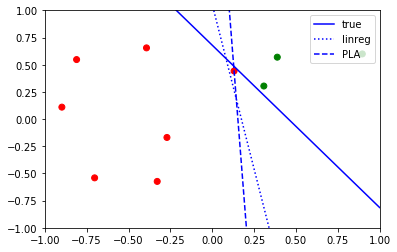

In [31]:
### Plotted example
ex=PLA_run_linreginit(10, plot=True)

## Problem 8

### Answer: [d] $0.5$ 

### Code:

In [12]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x[0]**2+x[1]**2-0.6

def line(x,m,b):
    return m*x+b

def gen_points_2d_bias(N,xleft=-1,xright=1,yleft=-1,yright=1):
    pts=[[1,np.random.uniform(xleft,xright),np.random.uniform(yleft,yright)] for i in range(N)]
    return np.array(pts)

def add_noise(y,percentage):
    nflips=np.int(len(y)*percentage/100)
    randindex=np.random.choice(range(len(y)), nflips, replace=False)
    for i in range(nflips):
        y[randindex[i]]*=-1
    return y

def gen_bias_input(N_pts,ftarget,noise=0,plot=True):
    data=gen_points_2d_bias(N_pts)
    y=np.sign(ftarget(data[:,1:3].T))
    if(noise!=0):
        y=add_noise(y,noise)
    if(plot==True):
        col=[]
        for i in range(len(y)):
            if(y[i]>0): col.append('red')
            else: col.append('green')
        x0=np.linspace(-1,1,100)
        y0=np.linspace(-1,1,100)
        x0,y0=np.meshgrid(x0,y0)
        plt.contour(x0,y0,ftarget([x0,y0]),[0],colors='blue',linestyles='solid')
        plt.scatter(data[:,1],data[:,2],color=col)
        plt.xlim([-1, 1])
        plt.ylim([-1, 1])
    return data, y

def h(w,data):
    return np.sign(np.dot(w,data.T))

def Eout_estimate(ftarget,w,Nval=1000):
    data,output=gen_bias_input(Nval,ftarget,plot=False)
    g=h(w,data)
    testg=(g==output)
    Eout=len(np.where(testg==False)[0])
    return Eout/Nval

def linear_regression_w(X,y):
    return np.dot(np.linalg.pinv(X),y)

def linreg_run_linear(N_pts,ftarget,noise=0,plot=False):
    
    #Generating non-linearly separable points
    data,y=gen_bias_input(N_pts,ftarget,noise=noise,plot=plot)
    
    #Computing linear regression weights
    w=linear_regression_w(data,y)
    
    #Ein computation
    g=h(w,data)
    testg=(g==y)
    Ein=len(np.where(testg==False)[0])/N_pts
    
    #Eout computation 
    Eout=Eout_estimate(ftarget,w)
    
    #Plot
    if(plot==True):
        x=np.linspace(-1,1,100)
        plt.plot(x,line(x,-w[1]/w[2],-w[0]/w[2]),color='blue',linestyle='dashed',label='lin_reg')
        plt.legend()
        plt.show
    return w, Ein, Eout

def average_linreg_linear(N_pts,N_runs,ftarget,noise=0):
    average_Ein=0
    average_Eout=0
    for i in range(N_runs):
        exp=linreg_run_linear(N_pts,ftarget,noise=noise)
        average_Ein+=exp[1]
        average_Eout+=exp[2]
    print("#######")
    print("Here's the result for N_runs=",N_runs,"with N_pts=",N_pts)
    print("Average Ein:",average_Ein/N_runs)
    print("Average Eout:",average_Eout/N_runs)

In [13]:
average_linreg_linear(1000,1000,f,noise=10)

#######
Here's the result for N_runs= 1000 with N_pts= 1000
Average Ein: 0.505258
Average Eout: 0.5248650000000001


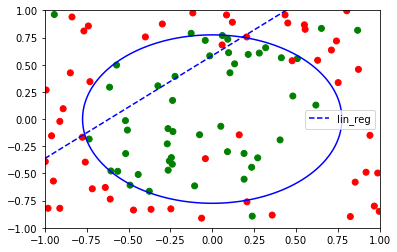

In [14]:
# Plotted Example

ex=linreg_run_linear(100,f,noise=10,plot=True)

## Problems 9-10

### Answers: [a] $g(x_1,x_2)={\rm sign}(-1-0.05 x_1+0.08 x_2+0.13 x_1 x_2+1.5 x_1^2+1.5 x_2^2)$ , [b] $0.1$

### Code:

In [15]:
def nonlin_transform(data):
    return np.column_stack((data[:,0],data[:,1],data[:,2],data[:,1]*data[:,2],data[:,1]**2,data[:,2]**2))

def Eout_estimate_nonlinear(ftarget,w,noise=0,Nval=1000):
    data,output=gen_bias_input(Nval,ftarget,noise=noise,plot=False)
    data=nonlin_transform(data)
    g=h(w,data)
    testg=(g==output)
    Eout=len(np.where(testg==False)[0])
    return Eout/Nval

def h(w,data):
    return np.sign(np.dot(w,data.T))

def linreg_run_nonlinear(N_pts,ftarget,noise=0,plot=False):
    
    #Generating non-linearly separable points
    points,y=gen_bias_input(N_pts,ftarget,noise=noise,plot=plot)
    
    #Transform data into non-linear feature vector
    data=nonlin_transform(points)
    
    #Computing linear regression weights
    w=linear_regression_w(data,y)
    
    #Ein computation
    g=h(w,data)
    testg=(g==y)
    Ein=len(np.where(testg==False)[0])/N_pts
    
    #Eout computation 
    Eout=Eout_estimate_nonlinear(ftarget,w,noise=noise)
    
    #Plot
    if(plot==True):
        x1=np.linspace(-1,1,100)
        x2=np.linspace(-1,1,100)
        x1,x2=np.meshgrid(x1,x2)
        plt.contour(x1,x2,w[0]+w[1]*x1+w[2]*x2+w[3]*x1*x2+w[4]*x1**2+w[5]*x2**2,[0],colors='blue',linestyles='dashed')
        plt.show
    
    return w, Ein, Eout

def average_linreg_nonlinear(N_pts,N_runs,ftarget,noise=0):
    sum_Ein=0
    sum_Eout=0
    sum_w=np.zeros(6)
    for i in range(N_runs):
        exp=linreg_run_nonlinear(N_pts,ftarget,noise=noise)
        sum_w+=exp[0]
        sum_Ein+=exp[1]
        sum_Eout+=exp[2]
    av_w=sum_w/N_runs
    av_Ein=sum_Ein/N_runs
    av_Eout=sum_Eout/N_runs
    print("#######")
    print("Here's the result for N_runs=",N_runs,"with N_pts=",N_pts)
    print("Average weights:",av_w)
    print("Average Ein:", av_Ein)
    print("Average Eout:",sum_Eout/N_runs)
    return av_w,av_Ein,av_Eout

def check_weights(av_w,given_w,name='Insert name',Nval=1000):
    points=gen_points_2d_bias(Nval)
    data=nonlin_transform(points)
    g_av=h(av_w,data)
    g_given=h(given_w,data)
    testg=(g_av==g_given)
    P_agree=len(np.where(testg==True)[0])
    print('The function',name,'agrees with the solution of Linear Regression with a probability of',P_agree/Nval)
    return P_agree/Nval

In [16]:
w,Ein,Eout=average_linreg_nonlinear(1000,1000,f,noise=10)

#######
Here's the result for N_runs= 1000 with N_pts= 1000
Average weights: [-9.92570638e-01 -7.26949696e-04  3.68746671e-03  9.20842355e-04
  1.56513471e+00  1.55346432e+00]
Average Ein: 0.12367900000000003
Average Eout: 0.125895


In [17]:
g1=np.array([-1,-0.05,0.08,0.13,1.5,1.5])
g2=np.array([-1,-0.05,0.08,0.13,1.5,15])
g3=np.array([-1,-0.05,0.08,0.13,15,1.5])
g4=np.array([-1,-1.5,0.08,0.13,0.05,0.05])
g5=np.array([-1,-0.05,0.08,1.5,0.15,0.15])

t1=check_weights(w,g1,'[a]')
t2=check_weights(w,g2,'[b]')
t3=check_weights(w,g3,'[c]')
t4=check_weights(w,g4,'[d]')
t5=check_weights(w,g5,'[e]')

The function [a] agrees with the solution of Linear Regression with a probability of 0.974
The function [b] agrees with the solution of Linear Regression with a probability of 0.662
The function [c] agrees with the solution of Linear Regression with a probability of 0.663
The function [d] agrees with the solution of Linear Regression with a probability of 0.64
The function [e] agrees with the solution of Linear Regression with a probability of 0.573


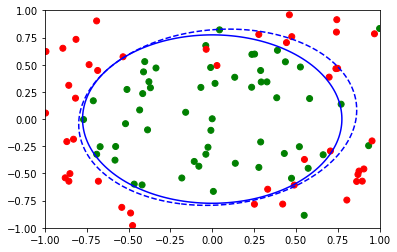

In [18]:
# Plotted Example

ex=linreg_run_nonlinear(100,f,noise=10,plot=True)